<hr/>
<b>Nombre</b>: Sebastian Yepes Acevedo
<br/>

## Enunciado

**Objetivo**: Estudiar la dinámica del péndulo doble utilizando los métodos de Lagrange y Hamilton.

Un péndulo doble es un sistema formado por 2 partículas puntuales de masas $m_1$ y $m_2$ unidas por varillas inextensibles de longitudes $L_1$ y $L_2$. La varilla $L_1$ esta fija a un punto del espacio.

**Procedimiento**:

1. Para este sistema identifique:

  - Número de partículas: _____________
  - Número de coordenadas: _____________
  - Número de restricciones: _____________
  - Número de grados de libertad: _____________

  Identifique las variables generalizadas del sistema y explique por qué esas variables son apropiadas para describir el sistema con el método de Lagrange.

2. Escriba las ecuaciones que permiten transformar de las variables generalizadas $\{q_j\}_M$ a las coordenadas $\{\vec r_i\}_N$ y viceversa (transformación inversa).

3. Usando `SymPy` escriba una rutina que, dadas las ecuaciones de transformación  $\{\vec r_i(\{q_j\}_M)\}_N$ calcule la función de energía cinética para el sistema y sus derivadas.

4. Usando `SymPy`, determine la fórmula para las fuerzas generalizadas.

5. Usando los resultados en 3 y en 4, escriba las ecuaciones de movimiento del sistema a partir de las ecuaciones de Lagrange del Sistema. Es normal que las ecuaciones se escriban como la segunda derivada de cada variable generalizada como función de las primeras derivada de las variables generalizadas y las variables generalizadas en sí.  Es decir las ecuaciones deben tener la forma:

  $$
  \ddot q_j = f_j (\{q_j\}_M,\{\dot q_j\}_M,t)
  $$

6. Programe las ecuaciones de movimiento e intégrelas numéricamente para condiciones iniciales apropiadas. Haga una animación de la solución.

**Resultados esperados**:

- Este notebook con el procedimiento matemáticos y numéricos debidamente comentados en celdas de texto y de código.

- Gráficos mínimos:
  - Animación del movimiento del sistema.

- En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

## Solución

# Punto 1

Para el problema del pendulo doble, identificaremos en principio lo siguiente:

- 2 Particulas
- 6 coordenadas
- 4 restricciones
- 2 grados de libertad

Notamos que las variables generalizadas del sistema son $\theta_1$ y $\theta_2$.

Usamos estas variables con el fin de representar de manera más cómoda el movimiento de los pendulos, dado que las variables elegidas cumplen con las restricciones propuestas para el sistema y simplifican de gran manera los calculos a realizar.

 Ahora, usaremos $x,y$ para ambas masas del pendulo como coordenadas del sistema, no incluims a $z$ por la restricción presentada, con lo cual $z=0$. De igual manera $\dot{x},\dot{y}$, para representar las velocidades de las masas.

Con ello, definiremos las siguientes ecuaciones en el punto a continuación

# Punto 2

Definimos entonces las ecuaciones generalizadas para nuestro problema en cuestión:

Comencemos para la masa 1
$$x_1 = l_1\sin(\theta_1)$$
$$y_1 = -l_1\cos(\theta_1)$$

Ahora identifiquemos las velocidades:

$$\dot{x_1} = l_1\cos(\theta_1)\dot{\theta_1}$$
$$\dot{y_1} = l_1\sin(\theta_1)\dot{\theta_1}$$

Ahora, para la segunda masa, tendremos en cuenta la contribución anterior por parte del sistema de la masa 1 y la masa 2:

$$x_2 = l_1\sin(\theta_1)+l_2\sin(\theta_2)$$
$$y_2 = -l_1\cos(\theta_1)-l_2\cos(\theta_2)$$

Observemos ahora las velocidades:

$$\dot{x_2} = l_1\cos(\theta_1)\dot{\theta_1}+l_2\cos(\theta_2)\dot{\theta_2}$$
$$\dot{y_2} = l_1\sin(\theta_1)\dot{\theta_1}+l_2\sin(\theta_2)\dot{\theta_2}$$

Con ello, ahora podemos escribir la inversa para las coordenadas generalizadas:

Para ello, reescribiremos la ecuación en primer lugar en terminos de $\theta_1$, luego para $\theta_2$:


$$\sin{\theta_1} = \frac{x_1}{l_1}$$

$$\cos{\theta_1} = \frac{y_1}{l_1}$$

$$\theta_1 = \tan^{-1}\left(-\frac{x_1}{y_1}\right)$$

Ahora hagamos lo propio para $\theta_2$

$$\sin{\theta_2}=\frac{x_2-x_1}{l_2}$$

$$\cos{\theta_2}=\frac{y_1-y_2}{l_2}$$

$$\theta_2 = \tan^{-1} \left(\frac{x_2-x_1}{y_1-y_2}\right)$$

Encontrando así la transformada inversa a nuestras coordenadas

# Punto 3

Importamos las bibliotecas necesarias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.vector import*

Definimos en principio los symbolos que corresponden a las constantes del ejercicio y al tiempo. Posterior a esto, definimos las variables generalizadas del problema como función del tiempo para realizar las operaciones necesarias en el formalismo Lagrangiano.

Una vez hecho esto, se definen las coordenadas del sistema y sus derivadas, pas así calcular la energía cinética en el pendulo doble.

In [ ]:
l1,l2,m1,m2,g,t = symbols('l1,l2,m1,m2,g,t')

#definimos funciones dependientes de t
q1 = Function('q1')(t)
q2 = Function('q2')(t)

x1 = l1*sin(q1)
y1 = -l1*cos(q1)

x2 = l1*sin(q1) + l2*sin(q2)
y2 = -l1*cos(q1) - l2*cos(q2)

dx1 = diff(x1,t)
dy1 = diff(y1,t)
dx2 = diff(x2,t)
dy2 = diff(y2,t)

#Calculo de la energía cinética
T = (1/2)*m1*dx1**2 + (1/2)*m1*dy1**2 + (1/2)*m2*dx2**2 + (1/2)*m2*dy2**2

Tsimp = simplify(T)

Tsimp

0.5*l1**2*m1*Derivative(q1(t), t)**2 + 0.5*l1**2*m2*Derivative(q1(t), t)**2 + 1.0*l1*l2*m2*cos(q1(t) - q2(t))*Derivative(q1(t), t)*Derivative(q2(t), t) + 0.5*l2**2*m2*Derivative(q2(t), t)**2

Obtenemos así una expresión que describe la energía cinética con las variables generalizadas. Ahora, calcularemos las derivadas necesarias para los demás calculos a partir de la energía cinética

In [ ]:
#diferenciales necesarios
dTq1 = diff(Tsimp, q1)
dTq2 = diff(Tsimp, q2)

dTdq1 = diff(Tsimp, diff(q1,t))
dTdq2 = diff(Tsimp, diff(q2,t))

Ahora, expresamos también las derivadas temporales de las expresiones respecto a $\dot q_1$ y $\dot q_2$.

In [ ]:
derT1 = diff(dTdq1,t)
derT2 = diff(dTdq2,t)

Con estos calculos completamos la primera parte del análisis por medio del formalismo.

# Punto 4

Como paso siguiente, realizaremos la consideración de las fuerzas presentes en el sistema, teniendo en cuenta también las derivadas parciales de las coordenadas del sitema, respecto a las variables generalizadas del problema.

In [ ]:
#Definicion de vectores unitarios
N = CoordSys3D('N')
F1 = -m1*g*N.j
F2 = -m2*g*N.j

dx1dq1 = diff(x1,q1)
dy1dq1 = diff(y1,q1)

dx2dq1 = diff(x2,q1)
dy2dq1 = diff(y2,q1)


dx1dq2 = diff(x1,q2)
dy1dq2 = diff(y1,q2)

dx2dq2 = diff(x2,q2)
dy2dq2 = diff(y2,q2)

#Fuerzas generalizadas
Q1 = F1.dot(dx1dq1*N.i + dy1dq1*N.j) + F2.dot(dx2dq1*N.i + dy2dq1*N.j)
Q2 = F1.dot(dx1dq2*N.i + dy1dq2*N.j) + F2.dot(dx2dq2*N.i + dy2dq2*N.j)


Con ello realizamos el calculo de las fuerzas generalizadas Q1 y Q2, que se encuentran siguiendo la siguiente ecuación:

$$Q_j=\sum_i \vec F_i \frac{∂\vec{r_i}}{\partial q_j}$$

# Punto 5

Con base en los calculos anteriores, podemos calcular finalmente las ecuaciones de Lagrange, las cuales siguen la siguiente forma:

$$\left \{\frac{d}{dt}\left(\frac{∂T}{∂\dot{q_k}} \right) - \frac{∂T}{∂q_k} = Q_k \right \}_M$$

In [ ]:
ecuacion1 = (derT1-dTq1-Q1)

ecuacion2 = (derT2-dTq2-Q2 )

ec1 = simplify(ecuacion1)
ec2 = simplify(ecuacion2)


In [ ]:
ec1

1.0*l1*(g*m1*sin(q1(t)) + g*m2*sin(q1(t)) + l1*m1*Derivative(q1(t), (t, 2)) + l1*m2*Derivative(q1(t), (t, 2)) + l2*m2*sin(q1(t) - q2(t))*Derivative(q2(t), t)**2 + l2*m2*cos(q1(t) - q2(t))*Derivative(q2(t), (t, 2)))

In [ ]:
ec2

1.0*l2*m2*(g*sin(q2(t)) - l1*sin(q1(t) - q2(t))*Derivative(q1(t), t)**2 + l1*cos(q1(t) - q2(t))*Derivative(q1(t), (t, 2)) + l2*Derivative(q2(t), (t, 2)))

Obtenemos así la ecuación de movimiento de Lagrange para el pendulo doble.

Ahora bien, haciendo uso de sympy, definimos las ecuaciones basados en la forma de Lagrange, para luego simplificar la ecuación con el fin de usar la funcion solve para desacoplar las aceleraciones

In [ ]:
sols = solve([ec1,ec2], (diff(q1,(t,2)),diff(q2,(t,2))))

Una vez desacoplamos las aceleraciones, obtenemos las expresiones para $\ddot\theta_1$ y $\ddot\theta_2$

In [ ]:
sols[diff(q1,(t,2))].simplify()

(-g*m1*sin(q1(t)) - g*m2*sin(q1(t) - 2*q2(t))/2 - g*m2*sin(q1(t))/2 - l1*m2*sin(2*q1(t) - 2*q2(t))*Derivative(q1(t), t)**2/2 - l2*m2*sin(q1(t) - q2(t))*Derivative(q2(t), t)**2)/(l1*(m1 - m2*cos(q1(t) - q2(t))**2 + m2))

In [ ]:
sols[diff(q2,(t,2))].simplify()

(g*m1*sin(2*q1(t) - q2(t))/2 - g*m1*sin(q2(t))/2 + g*m2*sin(2*q1(t) - q2(t))/2 - g*m2*sin(q2(t))/2 + l1*m1*sin(q1(t) - q2(t))*Derivative(q1(t), t)**2 + l1*m2*sin(q1(t) - q2(t))*Derivative(q1(t), t)**2 + l2*m2*sin(2*q1(t) - 2*q2(t))*Derivative(q2(t), t)**2/2)/(l2*(m1 - m2*cos(q1(t) - q2(t))**2 + m2))

Notemos cómo sympy entrega las ecuaciones de forma un poco incómoda en su simplificación, sin embargo es equivalente a las expreciones encontradas en otras fuentes, mostremos así, la expresión en otras fuentes:

# Ecuación de movimiento Lagrangiano

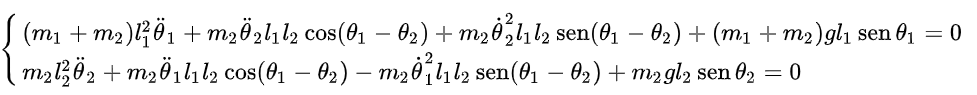

# Ecuación de movimiento desacoplada

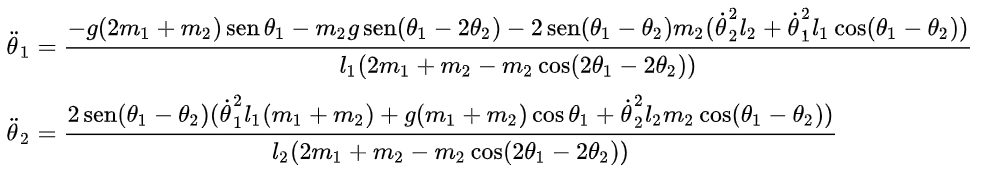

Fuentes:

Marion, Jerry B. (1996). Dinámica clásica de las partículas y sistemas. Barcelona: Ed. Reverté

[Wikipedia](https://https://es.wikipedia.org/wiki/P%C3%A9ndulo_doble)

# Punto 6

Comenzamos ahora con la simulación para el pendulo doble, para ello comenzamos definiendo una función para plantear las ecuaciones encontradas con anterioridad

In [ ]:
def ecuacionesPenduloDoble(Ys,t,l1,l2,m1,m2):
  g = 9.8

  q1,q2 = Ys[:2]
  v1,v2 = Ys[2:]

  #Velocidades
  dq1dt = v1
  dq2dt = v2
  #Aceleraciones
  dv1dt = ((-g*(2*m1 + m2)*np.sin(q1) - m2*g*np.sin(q1 - 2*q2)) - 2*np.sin(q1 - q2)*m2*(v2**2*l2 + v1**2*l1*np.cos(q1 - q2)))/(l1*(2*m1 + m2 - m2*np.cos(2*q1 - 2*q2)))
  dv2dt = ((2*np.sin(q1-q2))*(v1**2*l1*(m1 + m2) + g*(m1 + m2)*np.cos(q1) + v2**2*l2*m2*np.cos(q1-q2)))/(l2*(2*m1+m2-m2*np.cos(2*q1-2*q2)))

  return [dq1dt, dq2dt, dv1dt, dv2dt]

Importamos la función odeint para resolver la ecuación diferencial mostrada anteriormente y obtener a $\theta_1$ y $\theta_2$

In [ ]:
from scipy.integrate import odeint

Ahora definimos las condiciones iniciales de la simulación, tanto para las longitudes de las cuerdas inextencibles, las masas y finalmente la posición de los cuerpos.

In [ ]:
ts = np.linspace(0,10,200)
Yos = [np.pi/4,0.1,0.0,0.0]

l1 = 2.0
l2 = 1.0
m1 = 2.0
m2 = 1.0

sol = odeint(ecuacionesPenduloDoble, Yos,ts,args = (l1,l2,m1,m2))

theta1 = sol[:,0]
theta2 = sol[:,1]

Definimos las ecuaciones generalizadas para la simulación

In [ ]:
xs1 =  l1*np.sin(theta1)
ys1 =  -l1*np.cos(theta1)
xs2 =  l1*np.sin(theta1) + l2*np.sin(theta2)
ys2 =  -l1*np.cos(theta1) - l2*np.cos(theta2)

Graficamos el movimiento espererado del sistema

(-2.1143954900510527,
 2.0640906587931394,
 -3.0616449367423675,
 -1.3357644493078917)

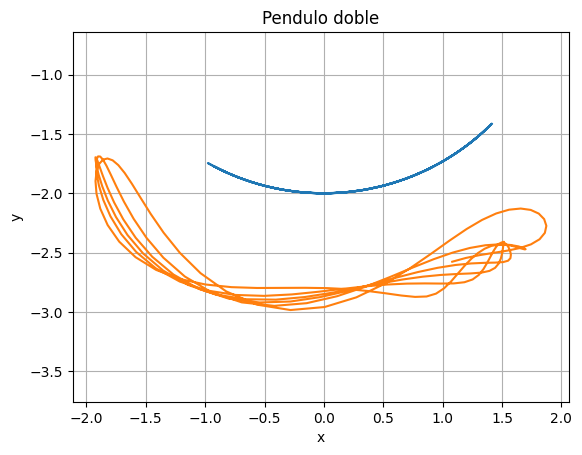

In [ ]:
plt.title('Pendulo doble')
plt.plot(xs1,ys1)
plt.plot(xs2,ys2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.axis('equal')

Ahora instalamos el paquete necesario para las animaciones

In [ ]:
!pip install -Uq celluloid

from celluloid import Camera

Con ello definimos nuevamente los parametros para graficar el movimiento del pendulo, agregando de igual forma las masas y las cuerdas para apreciar mucho más la animación

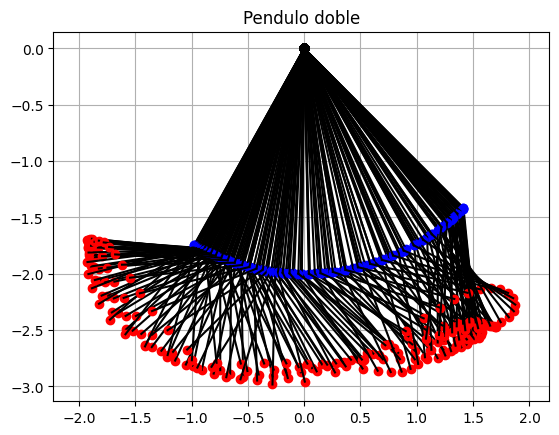

In [ ]:
fig,ax = plt.subplots(1,1)
camara = Camera(fig)
ax.set_title('Pendulo doble')
ax.set_xlabel('x')
ax.set_ylabel('y')
for i,t in enumerate(ts):
  ax.plot(xs1[i],ys1[i],'bo')
  ax.plot(xs2[i],ys2[i],'ro')
  ax.plot(0,0,'ko')
  ax.plot([0,xs1[i]],[0,ys1[i]],'k-')
  ax.plot([xs1[i],xs2[i]],[ys1[i],ys2[i]],'k-')
  camara.snap()

ax.axis('equal')
ax.grid()

Finalmente usamos el entorno de HTML para visualizar la animación

In [ ]:
anim = camara.animate()

from IPython.display import HTML

HTML(anim.to_jshtml())

Podemos así observar un pendulo doble funcionando de la forma esperada, además nos permite observar cómo el método del formalismo Lagrangiano logra describir de forma correcta un problema que con otros métodos podría llegar a ser más complejo, brindando así una buena confiabilidad para el método.